In [1]:
%pip uninstall -y tonic

Found existing installation: tonic 0.2.2
Uninstalling tonic-0.2.2:
  Successfully uninstalled tonic-0.2.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip uninstall -y tonic

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -U git+https://github.com/SpikeAI/tonic

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/SpikeAI/tonic to /tmp/pip-req-build-rz68blvw
  Created wheel for tonic: filename=tonic-0.2.2-py3-none-any.whl size=44140 sha256=4b5f1834adb1cb2d93db739d60db07db90a2dfc672f874e4dff7e7d7d81ee7f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-oh_w11ra/wheels/9d/00/ff/df7307670d7224df23701587b8fe274e258cb1320f55f7432f
Successfully built tonic
Note: you may need to restart the kernel to use updated packages.


inspired by
https://github.com/pytorch/vision
transform
https://github.com/pytorch/vision/blob/cffac640d703196ea9a369166fa8ae587cb5e64d/torchvision/datasets/mnist.py

In [4]:
import os
download = not os.path.isfile('data/nmnist_test.zip')
download

False

In [5]:
import tonic
import tonic.transforms as transforms

testset = tonic.datasets.NMNIST(save_to='./data', download=download, train=False)

In [6]:
testset.sensor_size, testset.ordering

((34, 34), 'xytp')

In [7]:
events, target = next(iter(testset))

In [8]:
events.shape

(5783, 4)

Timings are in microseconds

In [9]:
events[:, testset.ordering.find("t")]*1e-6

array([0.001044, 0.00124 , 0.003752, ..., 0.308994, 0.309202, 0.309979])

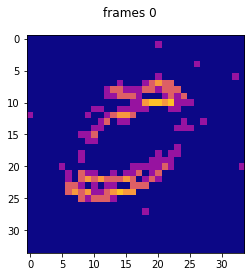

In [10]:
#%matplotlib notebook
from tonic.utils import plot_events
plot_events(events, sensor_size=testset.sensor_size, ordering=testset.ordering)

In [11]:
testloader = tonic.datasets.DataLoader(testset,
                                       batch_size=1,
                                       collate_fn=tonic.utils.pad_events, # what do we do when a digit does not contain the same number of events?
                                       shuffle=True)

events, target = next(iter(testloader))

In [12]:
target

[5]

In [13]:
events.shape

(1, 4902, 4)

In [14]:
x_index = testset.ordering.find("x")
x_index

0

In [15]:
events[0, 0, :]

array([1.400e+01, 1.300e+01, 1.885e+03, 1.000e+00])

In [16]:
events[0, :, 0]

array([14., 16., 10., ..., 10.,  6., 14.])

## event representations : 

https://tonic.readthedocs.io/en/latest/transformations.html#event-representations

In [17]:
transform = transforms.Compose([transforms.Denoise(time_filter=10000),
                                transforms.ToSparseTensor()]) 

testset = tonic.datasets.NMNIST(save_to='./data', download=download,
                                train=False,
                                transform=transform)

events, target = next(iter(testset))

In [18]:
events.shape, testset.sensor_size, testset.ordering

(torch.Size([308622, 31, 34]), (34, 34), 'xytp')

In [19]:
testset = tonic.datasets.NMNIST(save_to='./data', download=download,
                                train=False,
                                transform=transforms.ToSparseTensor())

events, target = next(iter(testset))

In [20]:
events[0]

tensor(indices=tensor([[  1044,   1240,   3752,  ..., 308994, 309202, 309979],
                       [     0,     18,      6,  ...,     19,      4,     11],
                       [    12,     27,     21,  ...,     24,      4,     22]]),
       values=tensor([ 1.,  1., -1.,  ...,  1.,  1.,  1.]),
       size=(309980, 34, 34), nnz=5783, layout=torch.sparse_coo)